In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
%matplotlib inline
#import keras
#from keras.models import Sequential
#from keras.layers import Dense, Dropout, Reshape, Activation
#from keras.layers import Embedding
#from keras.layers import Conv1D, GlobalAveragePooling1D, MaxPooling1D


import astropy
from astropy.io import fits
from astropy.visualization import astropy_mpl_style
plt.style.use(astropy_mpl_style)
from astropy.utils.data import get_pkg_data_filename
import scipy.signal as signal

from datetime import datetime
import os
from scipy.stats import moment

import tdpy
print(tdpy.__path__)
from tdpy import mcmc

['C:\\Users\\conta\\Anaconda3\\envs\\urop\\lib\\site-packages\\tdpy']


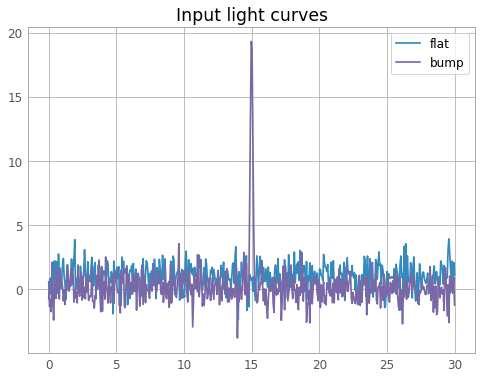

In [2]:
#producing test data
batch_size  = 2000   # >> 1000 lightcurves for each class
test_size   = 50      # >> 25 for each class
num_classes = 1
epochs      = 5
input_dim   = 500     # >> number of data points in light curve
half_batch = int(batch_size/2) #for doing the two halves of the fake data
noise = [0.2] 

# gaussians
height = 20.
center = 15.
stdev  = 10.
xmax   = 30.

def gaussian(datapoints, a, b, c):
    '''a = height, b = position of center, c = stdev'''
    x = np.linspace(0, xmax, datapoints)
    return  a * np.exp(-(x-b)**2 / 2*c**2) + np.random.normal(size=(datapoints))
x_test_flat = 1 + np.random.normal(size = (test_size, input_dim)) #produces a 50x500 item array, which gives the 500 flat data sets their 500 x values
y_test_flat = np.zeros((test_size, num_classes)) #produces a 50x2 array - 50 flat data sets, each with two possible classes. 
if num_classes == 2:
    y_test_flat[:,0] = 1
else:
    y_test_flat[:,0] = 0


# 50 gaussians (class 1)
x_test_bump = np.zeros((test_size, input_dim)) #another 500x500 item array, all zeroes
for i in range(test_size):
    x_test_bump[i] = gaussian(input_dim, a = height, b = center, c = stdev)
    #set the ith value of the x_train to be the gaussian output for that list item
y_test_bump = np.zeros((test_size, num_classes)) #creates y data, 500x2, all zeroes
if num_classes == 2:
    y_test_bump[:,1] = 1
else: 
    y_test_bump[:,0] = 1

#combine each type into one
x_test = np.concatenate((x_test_flat, x_test_bump), axis=0)
y_test = np.concatenate((y_test_flat, y_test_bump), axis=0)

#plotting testing data

plt.ion()
plt.figure(0)
plt.title('Input light curves')
plt.plot(np.linspace(0, xmax, input_dim), x_test[0], '-',
         label = 'flat')
n = int(test_size/2)
plt.plot(np.linspace(0, xmax, input_dim), x_test[int(test_size)], '-',
         label = 'bump')
plt.legend()

In [3]:
#calculate all moments for a given set of data:

def moments(dataset): 
    moments = []
    #moments.append(moment(dataset, moment = 0)) #total prob, should always be 1
    moments.append(moment(dataset, moment = 1)) # expectation value
    moments.append(moment(dataset, moment = 2)) #variance
    moments.append(moment(dataset, moment = 3)) #skew
    moments.append(moment(dataset, moment = 4)) #kurtosis
    return(moments)

moments(x_test[0])

[0.0, 0.91839051200493, -0.05024420205692347, 2.7099833766403005]

In [4]:
def featvec(sampledata): 
    featvec = moments(sampledata)
    
    f = np.linspace(0.01, 20, 100000)
    pg =signal.lombscargle(np.linspace(0, xmax, input_dim), sampledata, f, normalize = True)
    #input data
    plt.subplot(2, 1, 1)
    plt.plot(np.linspace(0,xmax, input_dim), sampledata, 'b+')
    plt.xlabel("BJD")
    plt.ylabel("Flux (e/s)")
    plt.title("data")
    #periodogram
    plt.subplot(2, 1, 2)
    plt.plot(f, pg)
    plt.xlabel("frequency")
    plt.ylabel("likelihood")
    plt.title("periodogram")
    featvec.append(f[pg.argmax()])
    return(featvec)

[0.0, 3.152767242815828, 34.42255880225287, 602.7688510176505, 0.13733757337573377]


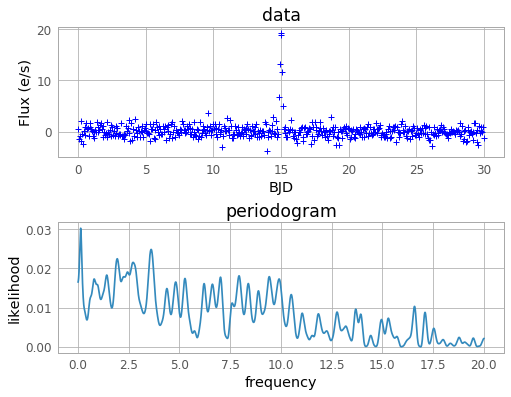

In [5]:
#test = featvec(x_test[0])
test2 = featvec(x_test[int(test_size)])
print(test2)

TypeError: plot_grid() missing 3 required positional arguments: 'strgplot', 'listsamp', and 'strgpara'